In [32]:
# Import
# In case of a an 'No module named' error, install dash, pandas etc
# pip install dash
import dash
import seaborn as sns
import matplotlib.pyplot as plt
from dash import dcc, html
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import yfinance as yf

In [23]:
# Fetch data
#S&P 500 - ^GSPC
#S&P 500 Vanguard - VOO
#S&P 500 Black Rock - BSPIX
#Vanguard Russel Index ETF - VTWO
#FTSE 100 - ^FTSE
#FTSE 200 - ^FTMC
# You can define the various tickers - ticker_symbol = '^GSPC'
tickers = ['^GSPC', 'VOO', 'BSPIX', 'VTWO', '^FTSE', '^FTMC']
df = yf.download(tickers,  start='2020-01-01', end='2024-10-11')
#data1 = yf.download('AAPL', start='2020-01-01', end='2023-01-01')


[*********************100%***********************]  6 of 6 completed


In [24]:
# Convert Closing Data to a Common Scale
# The base value will be set at the start date of the data set. 
# For each date, divide the closing price by the base value and multiply by 100.
# This converts the data into a percentage of the base value. 

# Create Columns for Each of the New Values
#print(data.columns)
# Display the first few rows of the data
#print(data.head())
print(df.columns)

MultiIndex([('Adj Close', 'BSPIX'),
            ('Adj Close',   'VOO'),
            ('Adj Close',  'VTWO'),
            ('Adj Close', '^FTMC'),
            ('Adj Close', '^FTSE'),
            ('Adj Close', '^GSPC'),
            (    'Close', 'BSPIX'),
            (    'Close',   'VOO'),
            (    'Close',  'VTWO'),
            (    'Close', '^FTMC'),
            (    'Close', '^FTSE'),
            (    'Close', '^GSPC'),
            (     'High', 'BSPIX'),
            (     'High',   'VOO'),
            (     'High',  'VTWO'),
            (     'High', '^FTMC'),
            (     'High', '^FTSE'),
            (     'High', '^GSPC'),
            (      'Low', 'BSPIX'),
            (      'Low',   'VOO'),
            (      'Low',  'VTWO'),
            (      'Low', '^FTMC'),
            (      'Low', '^FTSE'),
            (      'Low', '^GSPC'),
            (     'Open', 'BSPIX'),
            (     'Open',   'VOO'),
            (     'Open',  'VTWO'),
            (     'Open', '^

In [27]:
# Add Normalised Columns

# Normalize 'Adj Close' columns 
for ticker in ['BSPIX', 'VOO', 'VTWO', '^FTMC', '^FTSE', '^GSPC']:
    base_value = df[('Adj Close', ticker)].iloc[0]
    normalized_column = (df[('Adj Close', ticker)] / base_value) * 100
    df[('Normalized', ticker)] = normalized_column

In [28]:
print(df.columns)

MultiIndex([( 'Adj Close', 'BSPIX'),
            ( 'Adj Close',   'VOO'),
            ( 'Adj Close',  'VTWO'),
            ( 'Adj Close', '^FTMC'),
            ( 'Adj Close', '^FTSE'),
            ( 'Adj Close', '^GSPC'),
            (     'Close', 'BSPIX'),
            (     'Close',   'VOO'),
            (     'Close',  'VTWO'),
            (     'Close', '^FTMC'),
            (     'Close', '^FTSE'),
            (     'Close', '^GSPC'),
            (      'High', 'BSPIX'),
            (      'High',   'VOO'),
            (      'High',  'VTWO'),
            (      'High', '^FTMC'),
            (      'High', '^FTSE'),
            (      'High', '^GSPC'),
            (       'Low', 'BSPIX'),
            (       'Low',   'VOO'),
            (       'Low',  'VTWO'),
            (       'Low', '^FTMC'),
            (       'Low', '^FTSE'),
            (       'Low', '^GSPC'),
            (      'Open', 'BSPIX'),
            (      'Open',   'VOO'),
            (      'Open',  'VTWO'),
 

In [30]:
# Initialize the Dash app
app = dash.Dash(__name__)


# Create a figure
fig = go.Figure()

# Add a trace for each ticker
for ticker in tickers:
    fig.add_trace(go.Scatter(x=df.index, y=df['Normalized', ticker], mode='lines', name=ticker))
    
# Update layout to include title and axis labels 
fig.update_layout( title='Normalized Comparison of Adj Close Prices', xaxis_title='Date', yaxis_title='Normalized Closing Price (%)' )

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Stock Market Analysis Dashboard'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

[*********************100%***********************]  6 of 6 completed
C:\Users\pthuk\AppData\Local\Temp\ipykernel_38620\2762590416.py:24: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pthuk\\Documents\\git\\notes\\content\\python\\assets\\normalized_comparison.png'

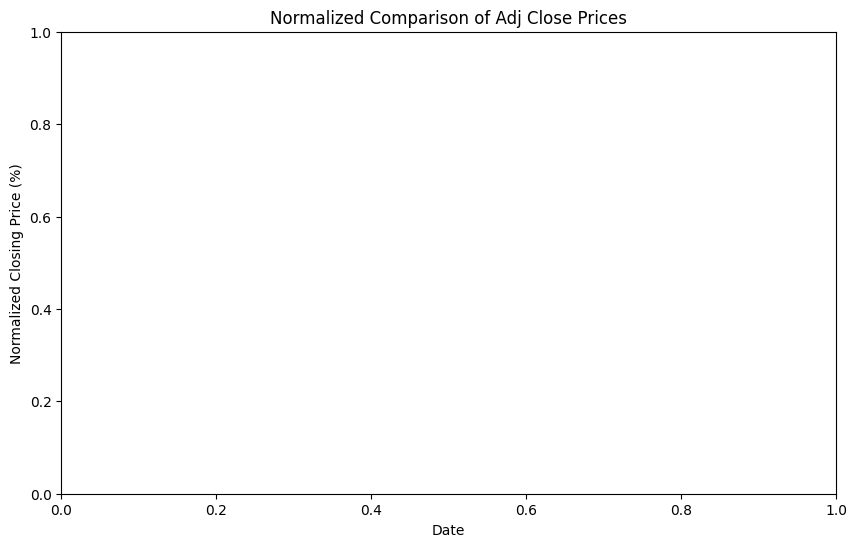

In [63]:
import dash
import seaborn as sns
import matplotlib.pyplot as plt
from dash import dcc, html
import pandas as pd
import yfinance as yf

# Initialize the Dash app
app = dash.Dash(__name__)

# Download data using yfinance
tickers = ['^GSPC', 'VOO', 'BSPIX', 'VTWO', '^FTSE', '^FTMC']
df = yf.download(tickers, start='2020-01-01', end='2024-10-11')

# Normalize 'Adj Close' columns
for ticker in tickers:
    base_value = df[('Adj Close', ticker)].iloc[0]
    normalized_column = (df[('Adj Close', ticker)] / base_value) * 100
    df[('Normalized', ticker)] = normalized_column

# ... (Your code for data download and normalization)

# Completely flatten the DataFrame
df_flattened = df.stack().reset_index()

# Select the desired columns
df_flattened = df_flattened[['Date', 'Ticker', 'Adj Close']]

# Filter for normalized data
df_normalized = df_flattened[df_flattened['Ticker'].str.startswith('Normalized')]

# ... (Rest of your code)

# Create Seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_normalized, x='Date', y='Adj Close', hue='Ticker')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (%)')
plt.title('Normalized Comparison of Adj Close Prices')

# Save the plot as an image
plt.savefig('assets/normalized_comparison.png')
plt.show()

# Define the layout of the Dash app
app.layout = html.Div(children=[
    html.H1(children='Stock Market Analysis Dashboard'),
    html.Img(src='/assets/normalized_comparison.png')  # Ensure this path is correct
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [60]:
print(df_reset.columns)


MultiIndex([(      'Date',      ''),
            ( 'Adj Close', 'BSPIX'),
            ( 'Adj Close',   'VOO'),
            ( 'Adj Close',  'VTWO'),
            ( 'Adj Close', '^FTMC'),
            ( 'Adj Close', '^FTSE'),
            ( 'Adj Close', '^GSPC'),
            (     'Close', 'BSPIX'),
            (     'Close',   'VOO'),
            (     'Close',  'VTWO'),
            (     'Close', '^FTMC'),
            (     'Close', '^FTSE'),
            (     'Close', '^GSPC'),
            (      'High', 'BSPIX'),
            (      'High',   'VOO'),
            (      'High',  'VTWO'),
            (      'High', '^FTMC'),
            (      'High', '^FTSE'),
            (      'High', '^GSPC'),
            (       'Low', 'BSPIX'),
            (       'Low',   'VOO'),
            (       'Low',  'VTWO'),
            (       'Low', '^FTMC'),
            (       'Low', '^FTSE'),
            (       'Low', '^GSPC'),
            (      'Open', 'BSPIX'),
            (      'Open',   'VOO'),
 